# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np

In [28]:
np.random.seed(0)

In [29]:
df = pd.read_parquet("../data/df.parquet")

In [30]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

# Fitting the model

In [31]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

MAE = []
MSE = []
R2 = []

n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = linear_regressor.predict(X_bs)
    # evaluate model
    mae = mean_absolute_error(y_bs, y_hat)
    mse = mean_squared_error(y_bs, y_hat)
    r2 = r2_score(y_bs, y_hat)
    MAE.append(mae)
    MSE.append(mse)
    R2.append(r2)

print('Train MAE: ' + str(np.mean(MAE)))
print('Train MSE: ' + str(np.mean(MSE)))
print('Train R2: ' + str(np.mean(R2)))

Train MAE: 37716.665075653924
Train MSE: 2167026217.1567087
Train R2: 0.9719924552212431


In [32]:
y_pred=linear_regressor.predict(X_test)

# Model Evaluation on Test Set

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mae

38784.608342368585

In [34]:
mse = mean_squared_error(y_test, y_pred)
mse

2237708811.2640786

In [35]:
r2 = r2_score(y_test, y_pred)
r2

0.9749998131666249

# Graphs (Expected Value vs Actual Data)

In [36]:
import matplotlib.pyplot as plt

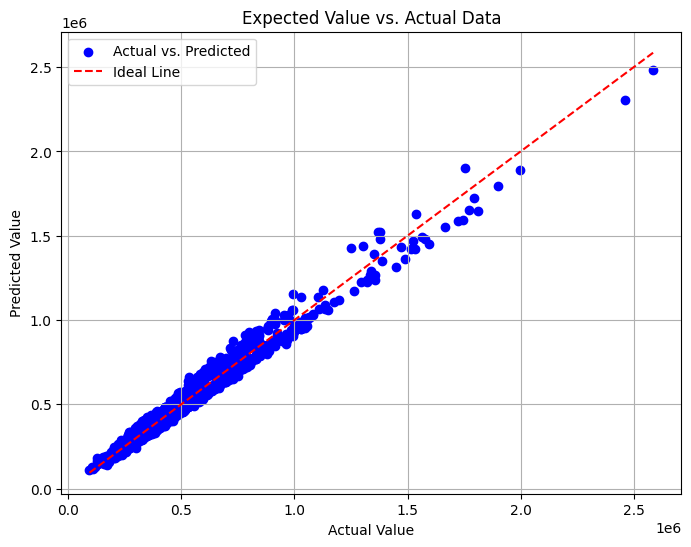

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Expected Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

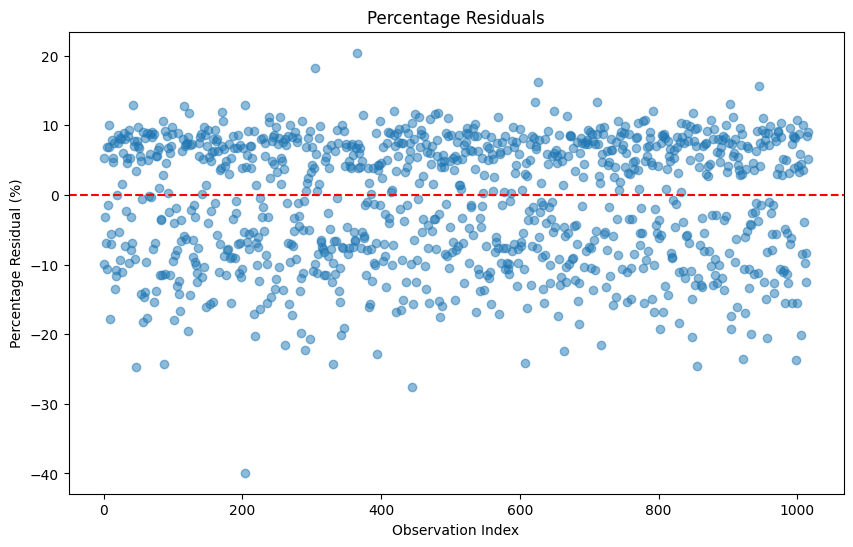

In [38]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()

# Saving best model

In [39]:
import pickle

pickle.dump(linear_regressor, open("../linear_model.pickle", "wb"))